# Optimizing or Maximizing Expected Return from ` Portfolios` Investment

## Introduction
* Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk'

* According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk. 
* This theory shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. 
* Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

* Portfolio:
    * Is the set of allocations for your investment among varity  of securities
    * for example:
        * 20% in APPL  stock
        * 30% in FB  stock
        * 50% in Goog  stock

#### NB:
* `Don't put all your eggs in one basket!`

## Objective:
* The aim of this analysis is to find the optimal allocation of your capital 4 (Apple, Facebook and Google) securities in the stock matket.

## Part 0: Import Dependancies

In [384]:
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Getting the Data

* Apple: Ticker symbol: AAPL
* Cisco : Ticker symbol: CSCO
* IBM : Ticker symbol: IBM
* Amazon : Ticker symbol: AMZN
* The Boeing Co: Ticker symbol: BA

In [385]:
# define the start and end date
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

In [386]:
# Use quandl to grasp the stock data
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date =end)  # column index 11
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date =end) 
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date =end) 
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date =end) 
boeing = quandl.get('WIKI/BA.11', start_date = start, end_date =end) 

In [387]:
# View one of the stocks
boeing.head()

,Adj. Close
Date,
2013-01-02,67.733862
2013-01-03,68.085406
2013-01-04,68.278756
2013-01-07,66.907732
2013-01-08,65.150009


In [388]:
# Loop through the stocks and calculate Normalized Return
for stock_df in (aapl, cisco, ibm, amzn, boeing):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [389]:
#Check the Head
boeing.head()

,Adj. Close,Normed Return
Date,,
2013-01-02,67.733862,1.000000
2013-01-03,68.085406,1.005190
2013-01-04,68.278756,1.008045
2013-01-07,66.907732,0.987803
2013-01-08,65.150009,0.961853


In [390]:
#Check the Tail
boeing.tail()

,Adj. Close,Normed Return
Date,,
2017-12-22,295.10,4.356757
2017-12-26,295.36,4.360596
2017-12-27,295.62,4.364434
2017-12-28,296.35,4.375212
2017-12-29,294.91,4.353952


# Portfolio Investment Decision
### Allocate your money among the five stocks/ shares

In [391]:
# 25% in apple
# 15% in cisco
# 20% in amazon
# 15% in ibm
# 25% in boeing 

In [392]:
# Zip the stocks and Calculate your allocation based on the above info.

for stock_df, allo in zip((aapl, cisco, ibm, amzn, boeing),[.25,.15,.2,.15,.25]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [393]:
# View head
boeing.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2013-01-02,67.733862,1.000000,0.250000
2013-01-03,68.085406,1.005190,0.251298
2013-01-04,68.278756,1.008045,0.252011
2013-01-07,66.907732,0.987803,0.246951
2013-01-08,65.150009,0.961853,0.240463


## Let assume that you decided to make 1 Million Dollar Portfolio investment 

In [394]:
# Assume that you allocate your 1 million dollars
for stock_df, allo in zip((aapl, cisco, ibm, amzn, boeing),[.25,.15,.2,.15,.25]):
    stock_df['Position Values'] = stock_df['Allocation']*1000000 

In [395]:
# Your allocation for Boeing Co
boeing.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2013-01-02,67.733862,1.000000,0.250000,250000.000000
2013-01-03,68.085406,1.005190,0.251298,251297.521733
2013-01-04,68.278756,1.008045,0.252011,252011.158687
2013-01-07,66.907732,0.987803,0.246951,246950.823926
2013-01-08,65.150009,0.961853,0.240463,240463.215259


In [396]:
# Now let Concasnate the whole Portfolio values for all allocation

all_pos_vals = [aapl['Position Values'], cisco['Position Values'], 
                ibm['Position Values'], amzn['Position Values'], boeing['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis = 1)
#create columns
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos', 'BOEING Pos']

In [397]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,BOEING Pos
Date,,,,,
2013-01-02,250000.000000,150000.000000,200000.000000,150000.000000,250000.000000
2013-01-03,246842.567801,150811.209440,198899.923606,150682.056663,251297.521733
2013-01-04,239968.672022,151046.460177,197596.129361,151072.636120,252011.158687
2013-01-07,238557.091598,149633.480826,196730.328495,156499.475341,246950.823926
2013-01-08,239199.133016,149778.761062,196455.309396,155287.396526,240463.215259


In [398]:
# Calculate the Total Pos values
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1) # the sum along axis 1

In [399]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,BOEING Pos,Total Pos
Date,,,,,,
2013-01-02,250000.000000,150000.000000,200000.000000,150000.000000,250000.000000,1000000.000000
2013-01-03,246842.567801,150811.209440,198899.923606,150682.056663,251297.521733,998533.279243
2013-01-04,239968.672022,151046.460177,197596.129361,151072.636120,252011.158687,991695.056366
2013-01-07,238557.091598,149633.480826,196730.328495,156499.475341,246950.823926,988371.200186
2013-01-08,239199.133016,149778.761062,196455.309396,155287.396526,240463.215259,981183.815259


In [400]:
## Now let plot these out

In [401]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Total Portfolio Value')

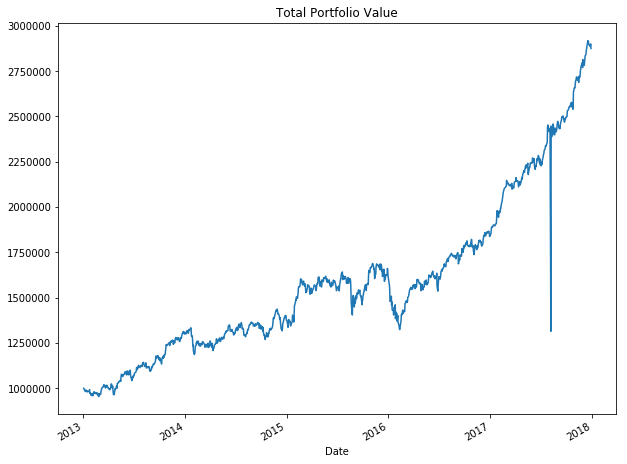

In [402]:
# Graph Total Position
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value') # This means if I invest 1000000 $, how much it will be

* We can see from graph that our 1 million  will be 2.7 million dollars after 5 yeras

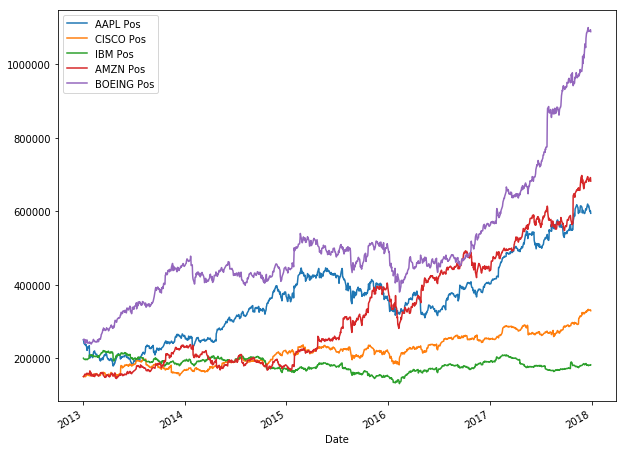

In [403]:
# Visualize the individual stock possition.
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

### Remember that individual stock depending on what you have allocated in the first place!

## The question is:
### `How do we maximize our Allocation for each of the stock?`

------------

## Portfolio Allocation and Sharpe Ratio

In [404]:
# Calculate daily Return
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1) # marginal change

In [405]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,BOEING Pos,Total Pos,Daily Return
Date,,,,,,,
2013-01-02,250000.000000,150000.000000,200000.000000,150000.000000,250000.000000,1000000.000000,NaN
2013-01-03,246842.567801,150811.209440,198899.923606,150682.056663,251297.521733,998533.279243,-0.001467
2013-01-04,239968.672022,151046.460177,197596.129361,151072.636120,252011.158687,991695.056366,-0.006848
2013-01-07,238557.091598,149633.480826,196730.328495,156499.475341,246950.823926,988371.200186,-0.003352
2013-01-08,239199.133016,149778.761062,196455.309396,155287.396526,240463.215259,981183.815259,-0.007272


In [406]:
# mean of Daily Return
portfolio_val['Daily Return'].mean()

0.0012013801429781041

Text(0.5,1,'Avg Daily Return')

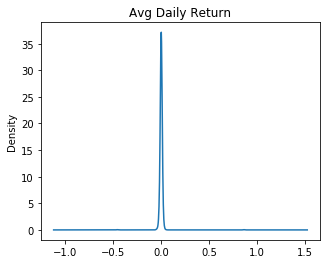

In [407]:
# You can plot Daily Return
portfolio_val['Daily Return'].plot(kind='kde', figsize=(5,4))
plt.title('Avg Daily Return')

In [408]:
# Calculate Cumulative Return
cumlative_return = 100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [409]:
cumlative_return

187.53458969945473

In [410]:
#  amount of Cummulative Return
portfolio_val['Total Pos'][-1]

2875345.8969945475

* If you start with 1 million on AAPL, CISCO, IBM, AMZN, BOEING  Companies in 5 years you will have 2.8 million dollar

## Let Calculate Sharpe Ratio
* a Measure for Risk Adjusted Return

In [411]:
#Daily Sharpe Ratio
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [412]:
SR

0.041192344251513656

In [413]:
# Annual SR
ASR = (252**0.5)*SR # K-Factor for daily is sqrt of annual working days

In [414]:
ASR

0.6539081928555973

# How do we use this number to Optimize Portfolio?

* Let us `Monte Carlo Simulation`:  Is the process of random allocations
* We wll us SciPy to calculte optimal way of portfolio allocation


In [415]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date =end)  # column index 11
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date =end) 
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date =end) 
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date =end) 
boeing = quandl.get('WIKI/BA.11', start_date = start, end_date =end) 

In [416]:
stocks= pd.concat([aapl, cisco, ibm, amzn,boeing], axis = 1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn', 'boeing']

In [417]:
stocks.head()

,aapl,cisco,ibm,amzn,boeing
Date,,,,,
2013-01-02,71.195748,17.452010,168.890592,257.3100,67.733862
2013-01-03,70.296565,17.546392,167.961630,258.4800,68.085406
2013-01-04,68.338996,17.573762,166.860637,259.1500,68.278756
2013-01-07,67.937002,17.409367,166.129509,268.4592,66.907732
2013-01-08,68.119845,17.426270,165.897268,266.3800,65.150009


## Daily Return

In [418]:
# mean daily return
stocks.pct_change(1).mean()

aapl      0.000803
cisco     0.000711
ibm      -0.000008
amzn      0.001373
boeing    0.001258
dtype: float64

In [419]:
# coorelations b/n the returns
stocks.pct_change(1).corr() # this give back the pearsion coratlation cofficient

,aapl,cisco,ibm,amzn,boeing
aapl,1.000000,0.301079,0.250937,0.257749,0.265737
cisco,0.301079,1.000000,0.392477,0.269002,0.312064
ibm,0.250937,0.392477,1.000000,0.221898,0.346328
amzn,0.257749,0.269002,0.221898,1.000000,0.265770
boeing,0.265737,0.312064,0.346328,0.265770,1.000000


### Arithmetic mean the  Return

In [420]:

stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn,boeing
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012630,0.005408,-0.005500,0.004547,0.005190
2013-01-04,-0.027847,0.001560,-0.006555,0.002592,0.002840
2013-01-07,-0.005882,-0.009355,-0.004382,0.035922,-0.020080
2013-01-08,0.002691,0.000971,-0.001398,-0.007745,-0.026271


## Log Return

In [421]:
# Logarithem Return
log_ret = np.log(stocks/stocks.shift(1)) # shifed by 1 time period
log_ret.head()

,aapl,cisco,ibm,amzn,boeing
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012710,0.005393,-0.005516,0.004537,0.005177
2013-01-04,-0.028242,0.001559,-0.006577,0.002589,0.002836
2013-01-07,-0.005900,-0.009399,-0.004391,0.035292,-0.020284
2013-01-08,0.002688,0.000970,-0.001399,-0.007775,-0.026622


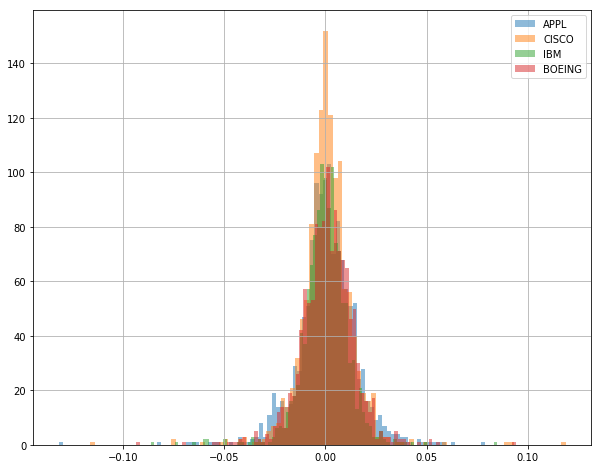

In [422]:
log_ret['aapl'].hist(bins=100,label='APPL',figsize=(10,8),alpha=0.5)
log_ret['cisco'].hist(bins=100,label='CISCO',alpha=0.5)
log_ret['ibm'].hist(bins=100,label='IBM',alpha=0.5)
log_ret['boeing'].hist(bins=100,label='BOEING',alpha=0.5)
plt.legend()

In [423]:
log_ret.columns

Index(['aapl', 'cisco', 'ibm', 'amzn', 'boeing'], dtype='object')

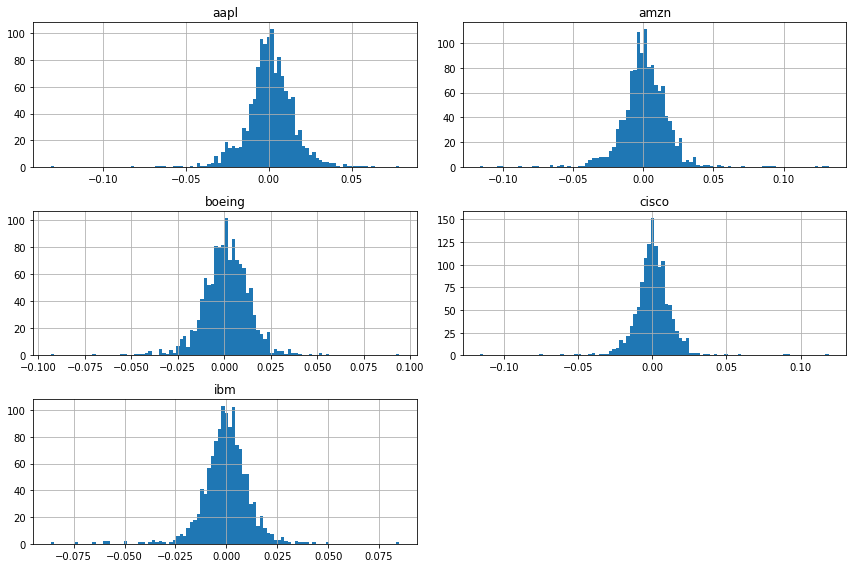

In [424]:
# Drow histogram
log_ret.hist(bins=100, figsize =(12,8))
plt.tight_layout()


In [425]:
# check the mean of each stock
log_ret.mean()

aapl      0.000671
cisco     0.000625
ibm      -0.000076
amzn      0.001205
boeing    0.001170
dtype: float64

In [426]:
# Covarance of pair waise of the colum
log_ret.cov()*252

,aapl,cisco,ibm,amzn,boeing
aapl,0.057359,0.014970,0.011142,0.017847,0.013381
cisco,0.014970,0.042926,0.015185,0.016335,0.013651
ibm,0.011142,0.015185,0.034755,0.012056,0.013474
amzn,0.017847,0.016335,0.012056,0.083755,0.016370
boeing,0.013381,0.013651,0.013474,0.016370,0.043696


### Let Do basic Calculation to find optimal combination of the stocks

In [427]:
np.random.seed(101)
print(stocks.columns)
weights = np.array(np.random.random(5))
print("Random Weights:")
print('='*len("Random Weights:"))
print(weights)

print('Rebalance')
print('='*len("Rebalance"))
weights=weights/np.sum(weights)
print(weights)

# Expected Return
print("Expected Portfolio Return")
print('='*len("Expected Portfolio Return"))
exp_ret = np.sum((log_ret.mean()*weights)*252)
print(exp_ret)
# expected volatility
print('Expected Volatility')
print('='*len("Expected Volatility"))
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252, weights)))
print(exp_vol)
# Sharpe Ratio
print('Sharpe Ratio')
print('='*len("Sharpe Ratio"))
SR= exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn', 'boeing'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]
Rebalance
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]
Expected Portfolio Return
0.21847226276687348
Expected Volatility
0.1545596404942887
Sharpe Ratio
1.4135143046929286


In [428]:
# Let take the above code and run them 5000 times

In [429]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
for ind in range(num_ports):
    
    #weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() *weights)*252)

    # expected volatility

    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio

    sharpe_arr[ind]= ret_arr[ind]/vol_arr[ind]


In [430]:
sharpe_arr.max()

1.5770136916686748

In [431]:
# Index location of the best sharpe ratio
sharpe_arr.argmax()

3143

In [432]:
#Optimal Allocation
all_weights[3143]


array([0.14960126, 0.0415699 , 0.00777728, 0.26550502, 0.53554653])

In [433]:
max_sr_ret = ret_arr[3143]
max_sr_vol = vol_arr[3143]

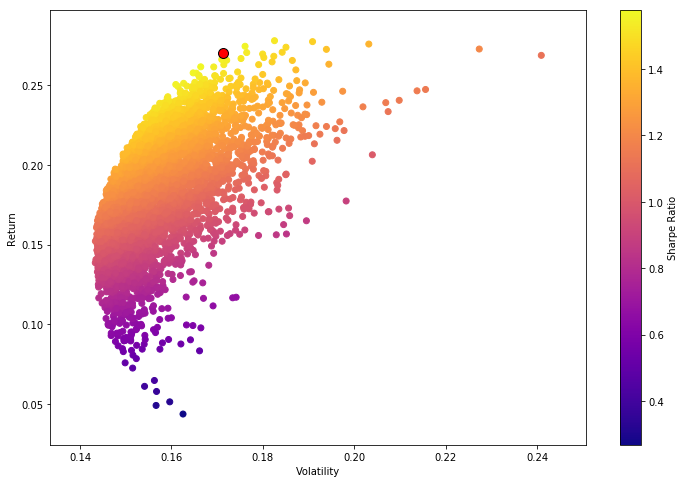

In [434]:
# plot
plt.figure(figsize =(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# put the max Sharpe ratio with Red point
plt.scatter(max_sr_vol, max_sr_ret, c="red",s=100, edgecolors='black')

# Mathematical Optimatization

In [435]:
def get_ret_vol_sr(weights): # function that take in weight
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)*252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [436]:
from scipy.optimize import minimize 

In [437]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized. Must be in the form
        ``f(x, *args)``. The optimizing argument, ``x``, is a 1-D array
        of points, and ``args`` is a tuple of any additional fixed parameters
        needed 

In [438]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1 # sharpe ratio is in index 2

In [439]:
# define constraint
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights) -1

In [440]:
cons = ({'type': 'eq', 'fun': check_sum})

In [441]:
bounds =((0,1),(0,1),(0,1),(0,1), (0,1))

In [442]:
# Initial guess
init_guess = [0.25,0.15,0.2,0.15,0.25]

In [443]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [444]:
opt_results

     fun: -1.593117041866813
     jac: array([ 6.17533922e-04,  7.05376267e-04,  8.16013202e-01, -8.98540020e-06,
       -1.92850828e-04])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([8.37374392e-02, 8.96411133e-02, 1.48129122e-17, 2.41891853e-01,
       5.84729594e-01])

In [445]:
#x:array are the optimal combination
opt_results.x

array([8.37374392e-02, 8.96411133e-02, 1.48129122e-17, 2.41891853e-01,
       5.84729594e-01])

In [446]:
opt_results.x.argmax()

4

In [447]:
max_sr_ret = ret_arr[4]
max_sr_vol = vol_arr[4]

In [448]:
max_sr_ret

0.1862323233510399

In [449]:
max_sr_vol

0.16395309887216342

In [450]:
# Using the above function to get ret_vol_sr
get_ret_vol_sr(opt_results.x)

array([0.27416586, 0.17209399, 1.59311704])

In [451]:
# Now check all optimal portfolio
frontier_y = np.linspace(0,0.3,100) # from the above graph, we can see that y is in the range (0:0.3)

In [452]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [453]:
frontier_volatility = []
for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun':check_sum},
            {'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_volatility, init_guess, method ='SLSQP', bounds=bounds, constraints =cons)
    frontier_volatility.append(result['fun'])

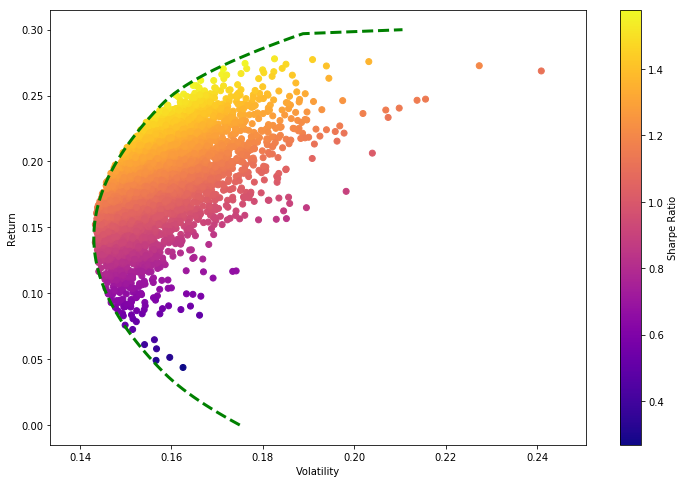

In [454]:
 # plot
plt.figure(figsize =(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


plt.plot(frontier_volatility, frontier_y, 'g--', linewidth =3)
